<a href="https://colab.research.google.com/github/inuwamobarak/musicxmental-health/blob/main/music_and_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('/content/mxmh_survey_results.csv')

In [22]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [24]:
# check for missing values
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [25]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [26]:
df['Age'] = df['Age'].fillna(round(df['Age'].mean(), 0))
df['Primary streaming service'] = df['Primary streaming service'].fillna(df['Primary streaming service'].mode()[0])
df['While working'] = df['While working'].fillna(df['While working'].mode()[0])
df['Instrumentalist'] = df['Instrumentalist'].fillna(df['Instrumentalist'].mode()[0])
df['Composer'] = df['Composer'].fillna(df['Composer'].mode()[0])
df['Foreign languages'] = df['Foreign languages'].fillna(df['Foreign languages'].mode()[0])
df['Music effects'] = df['Music effects'].fillna(df['Music effects'].mode()[0])
df['BPM'] = df['BPM'].fillna(round(df['BPM'].mean(), 0))

In [27]:
df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [28]:
df.shape

(736, 33)

In [29]:
df.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)

### Profiling the Music Listeners

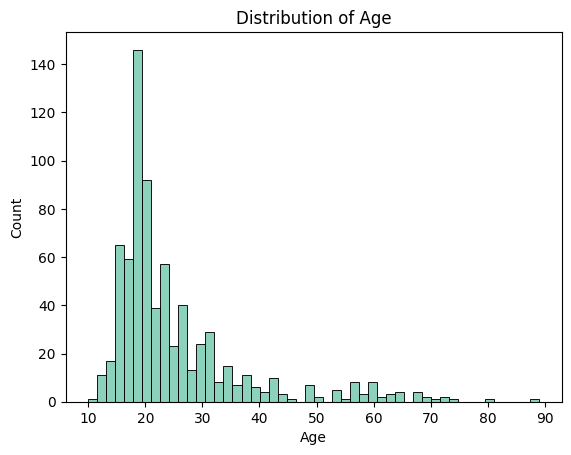

In [30]:
# plot the distribution of Age
g = sns.histplot(df['Age'], kde=False, bins=50)
g.set_title('Distribution of Age')
g.set_xlabel('Age')
g.set_ylabel('Count')
plt.show()

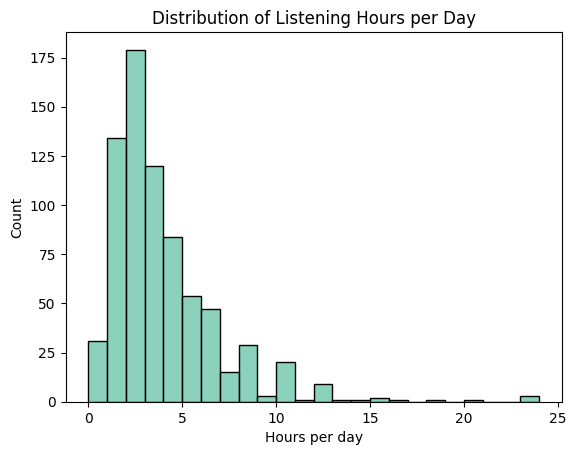

In [31]:
#  distribution of listening hours per week
g = sns.histplot(df['Hours per day'], kde=False, bins=24)
g.set_title('Distribution of Listening Hours per Day')
g.set_xlabel('Hours per day')
g.set_ylabel('Count')
plt.show()

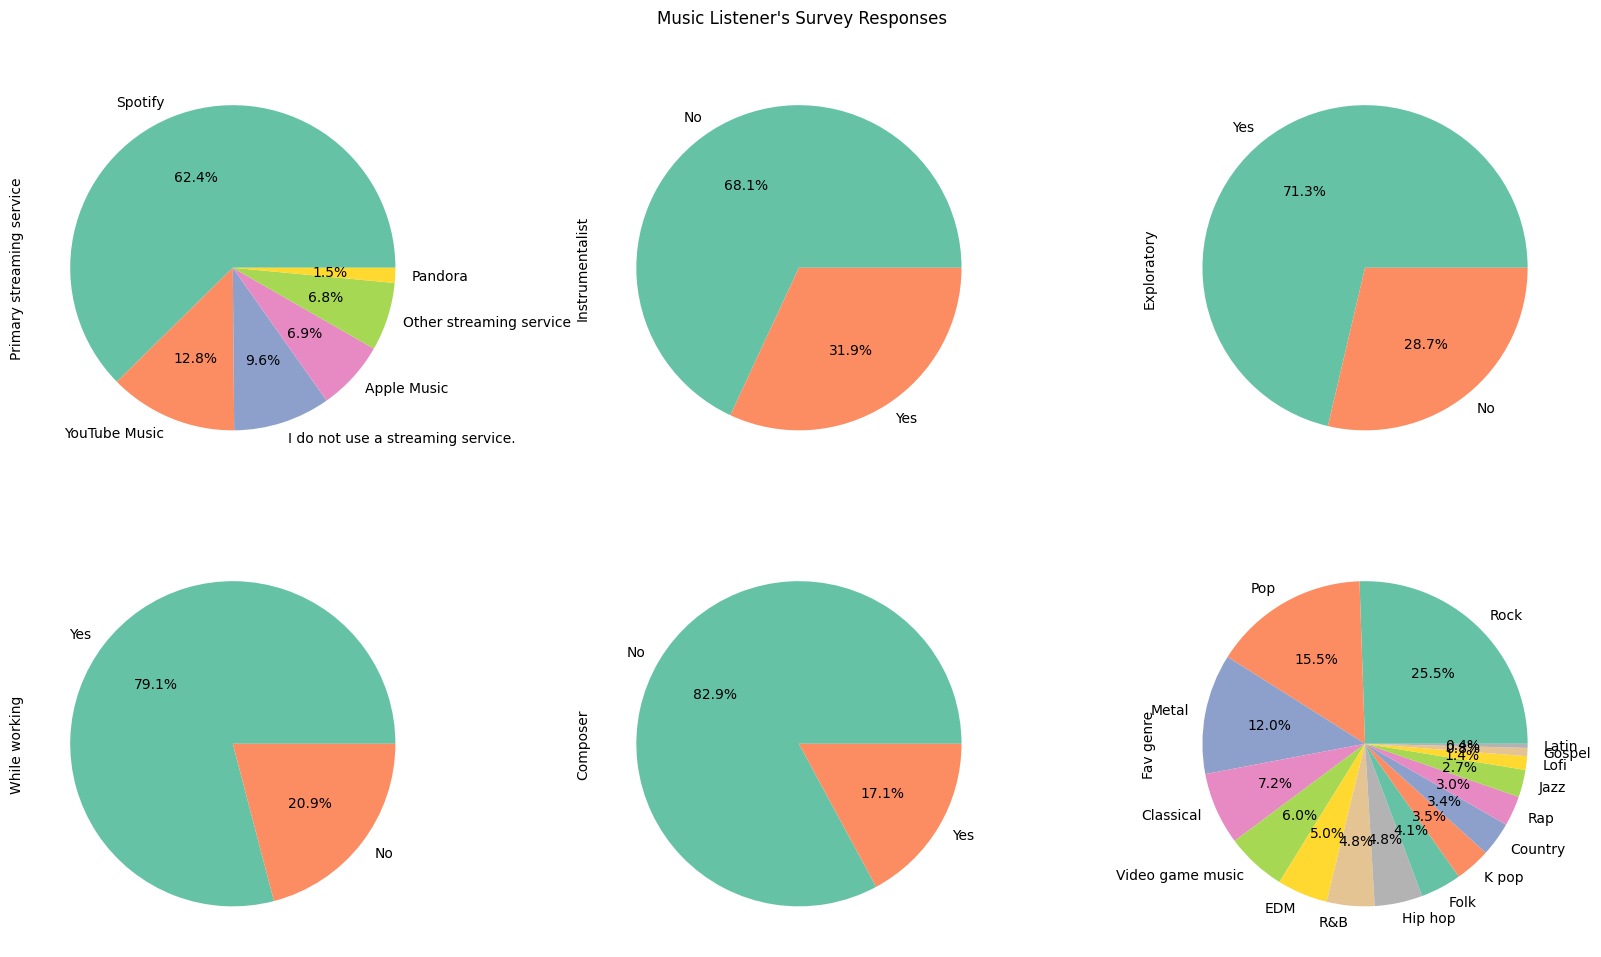

In [38]:
fig, ax = plt.subplots(figsize=(16, 10), nrows=2, ncols=3)

# pie chart for proportion of primary streaming service 
df['Primary streaming service'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 0])

# pie chart for proportion of listening to music while working
df['While working'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 0])

# pie chart for proportion of whether listener is a instrumentalist
df['Instrumentalist'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 1])

# pie chart for proportion of whether listener is a composer
df['Composer'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 1])

# pie chart for proportion of whether listener explores new music
df['Exploratory'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 2])

# pie chart for proportion of favourite genre
df['Fav genre'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 2])

plt.suptitle("Music Listener's Survey Responses")
plt.tight_layout()
plt.show()

## Music genres

Text(0, 0.5, '')

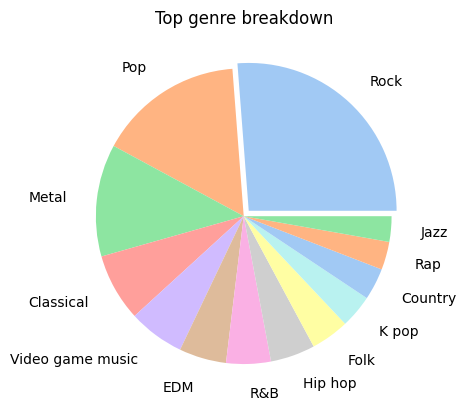

In [39]:
genre = df["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2, 
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], 
            colors = sns.color_palette('pastel')[0:13])

plt.title('Top genre breakdown')
plt.ylabel("")